In [1]:
import os
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)

In [2]:
displacement = np.zeros(1681*3)
for i in range (600) :
    with open(f'/home/shreyas/ME504/project/femcode(DL_executed)/femcode(DL_executed)/cont_ver2/disp_S/displacement_S{i}', 'r') as disp:
        disp1 = disp.read()
    disp_s = disp1.split()
    disp_a = np.array(disp_s)

    disp2 = np.array([])
    for i in range (6724) :
        disp2 = np.append(disp2,float(disp_a[i])) 
    
    disp_r = np.reshape(disp2,(1681,4))
    disp_x = disp_r[:,1]
    disp_y = disp_r[:,2]
    disp_z = disp_r[:,3]
    displace = np.hstack((disp_x,disp_y,disp_z))
    displacement = np.vstack((displacement,displace))

Displacement = np.delete(displacement,0,0)

Displacement = Displacement.reshape(600,5043,1)
print(Displacement.shape)

(600, 5043, 1)


In [3]:
properties = np.zeros(401)
for i in range (600) :
    with open(f'/home/shreyas/ME504/project/femcode(DL_executed)/femcode(DL_executed)/cont_ver2/prop/prop{i}.dat', 'r') as prop:
        prop1 = prop.read()
    prop_s = prop1.split()
    prop_a = np.array(prop_s)

    prop_n= np.delete(prop_a,0)
    prop_n = np.delete(prop_n,0)
    for j in range (13) :
        prop_n = np.delete(prop_n,-1)

    prop2 = np.array([])
    for i in range (401) :
        prop2 = np.append(prop2,float(prop_a[i])) 
    
    properties = np.vstack((properties,prop2))

Properties = np.delete(properties,0,0)

Properties = Properties.reshape(600,401,1)
print(Properties.shape)

(600, 401, 1)


In [4]:
# load corresponding to index 375 for load ()

load = np.zeros(1681)
load[1681-1] = 500000
load[82-1] = 238205
load[41-1] = 475664
Load = load

for i in range(599) :
    Load = np.vstack((Load,load))
Load = Load.reshape(600,1681,1)
print(Load.shape)

(600, 1681, 1)


In [5]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.layers import  Conv1D, MaxPooling1D, Flatten, Dense, concatenate,Reshape
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

2024-05-13 07:31:25.700372: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-13 07:31:25.700637: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-13 07:31:25.703047: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-13 07:31:25.728346: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-13 07:31:26.242195: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [6]:
X_train, X_test, y_train, y_test = train_test_split(Properties, Displacement, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((480, 401, 1), (120, 401, 1), (480, 5043, 1), (120, 5043, 1))

In [7]:
tf.keras.backend.clear_session()

In [8]:
network1d = keras.Sequential()
network1d.add(Conv1D(filters=70, kernel_size=2, activation='relu', input_shape=(401,1)))
network1d.add(Conv1D(filters=70, kernel_size=2, activation='relu'))
network1d.add(Flatten())
network1d.add(Dense(units=256, activation='relu'))
network1d.add(Dense(units=256, activation='relu'))
network1d.add(Dense(units=256, activation='relu'))
network1d.add(Dense(units=256, activation='relu'))
network1d.add(Dense(units=256, activation='relu'))
network1d.add(Dense(units=256, activation='relu'))
network1d.add(Dense(units=256, activation='relu'))
network1d.add(Dense(units=256, activation='relu'))
network1d.add(Dense(units=256, activation='relu'))
network1d.add(Dense(units=5043))
network1d.summary()

/home/shreyas/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-13 07:33:02.625702: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-13 07:33:02.625980: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 400, 70)        │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 399, 70)        │         9,870 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 27930)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     7,150,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5043)           │     1,296,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,982,803 (34.27 MB)

 Trainable params: 8,982,803 (34.27 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
network1d.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae'])  # Use mean squared error (mse) for regression

In [10]:
history=network1d.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 61239962988707840.0000 - mae: 156938720.0000 - val_loss: 327591886061568.0000 - val_mae: 14413661.0000
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 156361321086976.0000 - mae: 8788620.0000 - val_loss: 1061543739392.0000 - val_mae: 830001.7500
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 285992091648.0000 - mae: 274382.5625 - val_loss: 589440832.0000 - val_mae: 6846.8945
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 14649185280.0000 - mae: 52277.0195 - val_loss: 14.0627 - val_mae: 2.5018
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 2467699.0000 - mae: 94.7379 - val_loss: 14.0627 - val_mae: 2.5018
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 14.0627 - mae: 2.5018 - val_loss: 14.0627 - val_mae: 2.5018
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 14.0627 - mae: 2.5018 - val_loss: 14.0627 - val_mae: 2.5018
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━

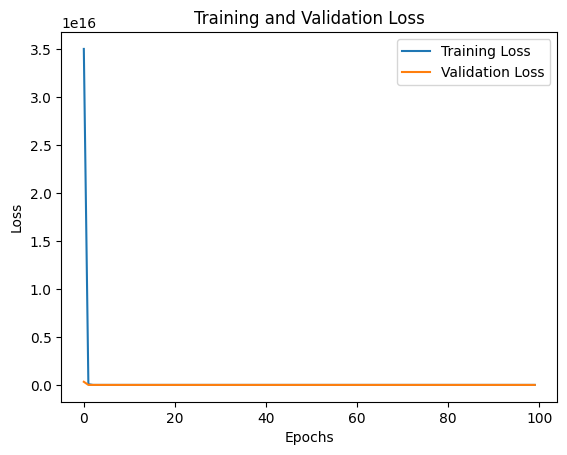

In [11]:
# Plot epochs vs. loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()